# Part I - (Prosper Loan Dataset Exploartion )
## by (Alaa' Nairat)

## Introduction

The Prosper dataset is a comprehensive collection of **113,937** loans, each described by **81** variables. These variables encompass a wide range of information, including loan amount, borrower rate (interest rate), current loan status, and borrower income, among many others. This dataset offers a valuable resource for analyzing various aspects of loan characteristics and borrower behavior. To better understand the intricacies of the dataset, refer to the detailed data dictionary that provides descriptions of each variable included in the dataset.

#### Questions:

-   What is the structure of your dataset?
-   What is/are the main feature(s) of interest in your dataset?
-   What features in the dataset do you think will help support your investigation into your feature(s) of interest?
-   How has the average loan amount changed over the years, and are there any noticeable trends or fluctuations in the average loan amount over time?
-   What is the most frequent loan status in the dataset?
-   What is the most frequent IncomeRange in the dataset?
-   Is the borrower a homeowner?
-   What is the distribution of Term values in the dataset?
-   What is the distribution of Loan Original Amount values in the dataset?
-   How does the borrower rate vary across different loan statuses?
-   What is the kind of correlation between StatedMonthlyIncome and DelinquenciesLast7Years?
-  How does the term (duration) of loans vary across different loan statuses and whether the borrower is a homeowner?

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df=pd.read_csv('prosperLoanData.csv')


In [3]:
shape = df.shape

# Format the numbers with thousands comma
formatted_shape = (format(shape[0], ','), format(shape[1], ','))

print(f"The dataset contains: {formatted_shape[0]} rows and {formatted_shape[1]} features respectively")


The dataset contains: 113,937 rows and 81 features respectively


In [4]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### What is the structure of your dataset?

The dataset conatins 113,937 rows and 81 featuers. 


### What is/are the main feature(s) of interest in your dataset?
I'm most interested in figuring out what features are best for affecting the loan status of the Prosper Loan Dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The Table below shows the varaibles of iterset and their decrition.

| Variable                    | Description                                                                                                                                                                                                |
|-----------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| LoanKey                     | Unique key for each loan. This is the same key that is used in the API.                                                                                                                                    |
| Term                        | The length of the loan expressed in months.                                                                                                                                                                |
| LoanStatus                  | The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.                     |
| LoanOriginalAmount          | The origination amount of the loan.                                                                                                                                                                        |
| ListingCategory (numeric)   | The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, etc. |
| ProsperRating (Alpha)       | The Prosper Rating assigned at the time the listing was created between AA - HR.                                                                                                                           |
| ListingCreationDate         | The date the listing was created.                                                                                                                                                                          |
| BorrowerRate                | The Borrower's interest rate for this loan.                                                                                                                                                                |
| IsBorrowerHomeowner         | A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.                                                      |
| Occupation                  | The Occupation selected by the Borrower at the time they created the listing.                                                                                                                              |
| StatedMonthlyIncome         | The monthly income the borrower stated at the time the listing was created.                                                                                                                                |
| EmploymentStatus            | The employment status of the borrower at the time they posted the listing.                                                                                                                                 |
| DelinquenciesLast7Years     | Number of delinquencies in the past 7 years at the time the credit profile was pulled.                                                                                                                     |

>  Features that will support the investigation into the main features of interest include ListingCreationDate, CreditGrade, Term, ClosedDate, BorrowerRate, PercentFunded, Recommendations, and Investors. These features provide context and additional details that can help in analyzing the loan performance and returns.

In [5]:
df_loan = df[['LoanKey', 'Term', 'LoanStatus', 'LoanOriginalAmount', 
                'ListingCategory (numeric)', 'ProsperRating (Alpha)', 
                'ListingCreationDate', 'BorrowerRate', 'IsBorrowerHomeowner', 
                'Occupation', 'StatedMonthlyIncome', 'EmploymentStatus', 
                'DelinquenciesLast7Years']]

In [6]:
df_loan

,LoanKey,Term,LoanStatus,LoanOriginalAmount,ListingCategory (numeric),ProsperRating (Alpha),ListingCreationDate,BorrowerRate,IsBorrowerHomeowner,Occupation,StatedMonthlyIncome,EmploymentStatus,DelinquenciesLast7Years
0,E33A3400205839220442E84,36,Completed,9425,0,NaN,2007-08-26 19:09:29.263000000,0.1580,True,Other,3083.333333,Self-employed,4.0
1,9E3B37071505919926B1D82,36,Current,10000,2,A,2014-02-27 08:28:07.900000000,0.0920,False,Professional,6125.000000,Employed,0.0
2,6954337960046817851BCB2,36,Completed,3001,0,NaN,2007-01-05 15:00:47.090000000,0.2750,False,Other,2083.333333,Not available,0.0
3,A0393664465886295619C51,36,Current,10000,16,A,2012-10-22 11:02:35.010000000,0.0974,True,Skilled Labor,2875.000000,Employed,14.0
4,A180369302188889200689E,36,Current,15000,2,D,2013-09-14 18:38:39.097000000,0.2085,True,Executive,9583.333333,Employed,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,9BD7367919051593140DB62,36,Current,10000,1,C,2013-04-14 05:55:02.663000000,0.1864,True,Food Service Management,4333.333333,Employed,7.0
113933,62D93634569816897D5A276,36,FinalPaymentInProgress,2000,7,A,2011-11-03 20:42:55.333000000,0.1110,True,Professional,8041.666667,Employed,4.0
113934,DD1A370200396006300ACA0,60,Current,10000,1,D,2013-12-13 05:49:12.703000000,0.2150,True,Other,2875.000000,Employed,0.0
113935,589536350469116027ED11B,60,Completed,15000,2,C,2011-11-14 13:18:26.597000000,0.2605,True,Food Service,3875.000000,Full-time,0.0


In [7]:
df_loan.isnull().sum()

LoanKey                          0
Term                             0
LoanStatus                       0
LoanOriginalAmount               0
ListingCategory (numeric)        0
ProsperRating (Alpha)        29084
ListingCreationDate              0
BorrowerRate                     0
IsBorrowerHomeowner              0
Occupation                    3588
StatedMonthlyIncome              0
EmploymentStatus              2255
DelinquenciesLast7Years        990
dtype: int64

The dataset has several fields with missing values. Here's a brief commentary on the relevant columns:

- **ProsperRating (Alpha)**: 29,084 missing values. This significant amount of missing data in an important risk indicator could affect risk assessment analyses.

- **Occupation**: 3,588 missing values. Missing occupation data limits demographic and risk profile analyses.

- **EmploymentStatus**: 2,255 missing values. Missing employment status data could impact the evaluation of borrower stability.

- **DelinquenciesLast7Years**: 990 missing values. Missing delinquency history can hinder accurate credit risk evaluation.

**Given that the dataset contains 113,937 rows:**

- ProsperRating (Alpha): 29,084 missing values, about 25.5% of the dataset.
- Occupation: 3,588 missing values, about 3.1% of the dataset.
- EmploymentStatus: 2,255 missing values, about 2.0% of the dataset.
- DelinquenciesLast7Years: 990 missing values, about 0.9% of the dataset.


In [8]:
num_duplicates = df_loan.duplicated().sum()
num_duplicates
print(f"The dataset contains: {num_duplicates} duplicated rows")

The dataset contains: 871 duplicated rows


In [9]:
duplicates = df_loan[df_loan.duplicated()]
duplicates

,LoanKey,Term,LoanStatus,LoanOriginalAmount,ListingCategory (numeric),ProsperRating (Alpha),ListingCreationDate,BorrowerRate,IsBorrowerHomeowner,Occupation,StatedMonthlyIncome,EmploymentStatus,DelinquenciesLast7Years
9,02163700809231365A56A1C,36,Current,10000,7,AA,2013-12-02 10:43:39.117000000,0.0629,True,Food Service,3333.333333,Employed,0.0
999,CB643706582969191E8C26B,60,Current,10000,1,B,2013-12-18 14:25:17.053000000,0.1535,True,Other,3750.000000,Employed,0.0
2539,DC303708663304668E74587,60,Current,35000,1,B,2014-01-11 07:50:08.037000000,0.1224,True,Police Officer/Correction Officer,10833.333333,Employed,0.0
4942,8D84369399064302947D8B5,36,Current,4000,7,HR,2013-09-26 09:35:36.317000000,0.3134,True,Laborer,4583.333333,Employed,56.0
5812,129C369881799628360C904,36,Current,15000,1,C,2013-09-24 13:27:48.287000000,0.2045,True,NaN,4166.666667,Other,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113548,6C203707183544065E3E202,60,Current,14000,18,D,2014-01-23 14:33:25.967000000,0.1960,True,Other,7666.666667,Employed,0.0
113636,F3E73698701527272D54247,36,Current,4000,1,C,2013-09-17 11:44:43.177000000,0.1760,True,NaN,2500.000000,Other,11.0
113733,F3AB369770667777597274C,60,Current,10000,1,B,2013-11-07 14:26:31.317000000,0.1819,False,Skilled Labor,4583.333333,Employed,0.0
113773,D895370150591392337ED6D,36,Current,10000,1,B,2013-12-06 05:43:13.830000000,0.1274,True,Other,2720.833333,Employed,0.0


In [10]:
df_loan.dtypes

LoanKey                       object
Term                           int64
LoanStatus                    object
LoanOriginalAmount             int64
ListingCategory (numeric)      int64
ProsperRating (Alpha)         object
ListingCreationDate           object
BorrowerRate                 float64
IsBorrowerHomeowner             bool
Occupation                    object
StatedMonthlyIncome          float64
EmploymentStatus              object
DelinquenciesLast7Years      float64
dtype: object

In [11]:
# Convert dtypes to a DataFrame for better readability
dtypes_df = df_loan.dtypes.reset_index()
dtypes_df.columns = ['Column', 'Data Type']
dtypes_df

# Display the DataFrame with data types


,Column,Data Type
0,LoanKey,object
1,Term,int64
2,LoanStatus,object
3,LoanOriginalAmount,int64
4,ListingCategory (numeric),int64
5,ProsperRating (Alpha),object
6,ListingCreationDate,object
7,BorrowerRate,float64
8,IsBorrowerHomeowner,bool
9,Occupation,object


In [12]:
# Filter to show only columns with object data types
object_dtype_df = dtypes_df[dtypes_df['Data Type'] == 'object']

# Display the filtered DataFrame
print(object_dtype_df)


                   Column Data Type
0                 LoanKey    object
2              LoanStatus    object
5   ProsperRating (Alpha)    object
6     ListingCreationDate    object
9              Occupation    object
11       EmploymentStatus    object


## Data Wrangling
In this section, we will address, duplicate and missing values, then adjust data types according to the findings from the previous section.

In [13]:
# drop the duplicates from the dataset
df_loan = df_loan.drop_duplicates()


In [14]:
# drop duplicates rows based on LoanKey
df_loan =df_loan.drop_duplicates(subset='LoanKey', keep='first')

In [15]:
# convert ListingCreationDate fro Object to Datetime
df['ListingCreationDate'] = pd.to_datetime(df['ListingCreationDate'])

In [16]:
# convert ClosedDate fro Object to Datetime
df['ClosedDate'] = pd.to_datetime(df['ClosedDate'])

In [17]:
# convert ListingCreationDate fro Object to Datetime

df_loan['ListingCreationDate'] = pd.to_datetime(df_loan['ListingCreationDate'], errors='coerce')


In [18]:
# Convert specified columns to categorical type
df_loan['LoanStatus'] = df_loan['LoanStatus'].astype('category')
df_loan['Occupation'] = df_loan['Occupation'].astype('category')
df_loan['EmploymentStatus'] = df_loan['EmploymentStatus'].astype('category')
df_loan['ProsperRating (Alpha)'] = df_loan['ProsperRating (Alpha)'].astype('category')



In [19]:
df_loan['LoanKey'].unique()

array(['E33A3400205839220442E84', '9E3B37071505919926B1D82',
       '6954337960046817851BCB2', ..., 'DD1A370200396006300ACA0',
       '589536350469116027ED11B', '00AF3704550953269A64E40'], dtype=object)

In [20]:
df_loan['LoanKey'] = df_loan['LoanKey'].astype('str')

In [21]:
print(type(df_loan['LoanKey'].iloc[0]))

<class 'str'>


In [22]:
# Verify the conversion
print(df_loan.dtypes)

LoanKey                              object
Term                                  int64
LoanStatus                         category
LoanOriginalAmount                    int64
ListingCategory (numeric)             int64
ProsperRating (Alpha)              category
ListingCreationDate          datetime64[ns]
BorrowerRate                        float64
IsBorrowerHomeowner                    bool
Occupation                         category
StatedMonthlyIncome                 float64
EmploymentStatus                   category
DelinquenciesLast7Years             float64
dtype: object


In [23]:
# Convert all int64 columns to int64 explicitly
int64_columns = df_loan.select_dtypes(include=['int64']).columns
df_loan[int64_columns] = df_loan[int64_columns].astype('int64')


In [24]:
float64_columns = df_loan.select_dtypes(include=['float64']).columns
df_loan[int64_columns] = df_loan[float64_columns].astype('float64')

In [25]:
df_loan.Occupation.unique()

['Other', 'Professional', 'Skilled Labor', 'Executive', 'Sales - Retail', ..., 'Judge', 'Student - College Junior', 'Car Dealer', 'Student - Community College', 'Student - College Freshman']
Length: 68
Categories (67, object): ['Accountant/CPA', 'Administrative Assistant', 'Analyst', 'Architect', ..., 'Tradesman - Mechanic', 'Tradesman - Plumber', 'Truck Driver', 'Waiter/Waitress']

In [26]:
print(f'There is {df_loan.Occupation.nunique()} unique values in the Occupation feature')

There is 67 unique values in the Occupation feature


In [27]:
# Display rows where the Occupation feature is null
null_occupation_rows = df_loan[df_loan['Occupation'].isnull()]

# Print the rows with null values in Occupation
null_occupation_rows

,LoanKey,Term,LoanStatus,LoanOriginalAmount,ListingCategory (numeric),ProsperRating (Alpha),ListingCreationDate,BorrowerRate,IsBorrowerHomeowner,Occupation,StatedMonthlyIncome,EmploymentStatus,DelinquenciesLast7Years
34,0C2F3706762182722E94190,0.1920,Current,4058.333333,15.0,C,2014-02-24 12:55:20.430,0.1920,True,NaN,4058.333333,Other,15.0
39,A3A23365984305581EF2551,0.1450,Completed,9583.333333,0.0,NaN,2006-07-11 17:14:14.647,0.1450,False,NaN,9583.333333,NaN,0.0
92,B5683365378813542660F21,0.0755,Completed,10833.333333,0.0,NaN,2006-07-02 11:05:02.857,0.0755,True,NaN,10833.333333,NaN,0.0
146,A52133660283610896B3237,0.0925,Completed,0.083333,0.0,NaN,2006-08-16 09:43:10.867,0.0925,False,NaN,0.083333,NaN,0.0
161,DEF737015194246431E5838,0.1355,Current,2429.166667,33.0,B,2013-12-20 14:57:44.580,0.1355,True,NaN,2429.166667,Other,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113709,47403699872025042C36CCC,0.2925,Current,4000.000000,52.0,E,2013-11-05 05:44:05.173,0.2925,False,NaN,4000.000000,Other,52.0
113712,BFB03365253687226E46B01,0.2375,Defaulted,7500.000000,0.0,NaN,2006-06-06 15:08:32.807,0.2375,False,NaN,7500.000000,NaN,0.0
113902,C73033644805718846E2159,0.0812,Completed,20833.333333,NaN,NaN,2006-03-26 00:11:04.620,0.0812,False,NaN,20833.333333,NaN,NaN
113914,063D3366920498906816DA9,0.2500,Defaulted,2400.000000,16.0,NaN,2006-08-09 14:34:40.010,0.2500,False,NaN,2400.000000,NaN,16.0


Since there are 3,588 missing values in the Occupation column, I will change them to *'Other'* as the occupation is unknown, which can be considered equivalent to *'Other'*.


In [28]:
# Replace NaN values with 'Other' in the Occupation column
df_loan['Occupation'] = df_loan['Occupation'].fillna('Other')

# Verify the change
print(df_loan['Occupation'].isnull().sum())  # This should print 0 if all NaNs are replaced


0


In [29]:
df_loan.EmploymentStatus.unique()

['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other', NaN, 'Not employed', 'Part-time', 'Retired']
Categories (8, object): ['Employed', 'Full-time', 'Not available', 'Not employed', 'Other', 'Part-time', 'Retired', 'Self-employed']

In [30]:
print(f'There is {df_loan.EmploymentStatus.nunique()} unique values in the EmploymentStatus feature')

There is 8 unique values in the EmploymentStatus feature


Regarding employment status, given that there is already an option labeled 'Not available', it makes sense to change the null values to 'Not available' for consistency and clarity.

In [31]:
# Replace NaN values with 'Other' in the Occupation column
df_loan['EmploymentStatus'] = df_loan['EmploymentStatus'].fillna('Not available')

# Verify the change
print(df_loan['EmploymentStatus'].isnull().sum())  # This should print 0 if all NaNs are replaced

0


In [32]:
df_loan.DelinquenciesLast7Years.unique() 

array([ 4.,  0., 14., 28.,  1., 12.,  5.,  8., 10., 27., 51., 15., 52.,
        3., 29., 18.,  2., 42., 72., 64., 73., 30., 11.,  7.,  6., 25.,
       17., 20., 23., 36., 21., 33., 13., 83., nan, 22., 38., 32.,  9.,
       50., 62., 44., 16., 75., 39., 40., 26., 31., 35., 19., 41., 34.,
       24., 49., 58., 63., 99., 45., 53., 46., 43., 56., 88., 48., 74.,
       47., 57., 77., 55., 37., 67., 86., 61., 66., 60., 54., 59., 71.,
       69., 76., 68., 92., 95., 96., 93., 79., 84., 87., 70., 65., 78.,
       91., 82., 90., 80., 85., 81., 94., 89., 98., 97.])

In [33]:
print(f'There is {df_loan.DelinquenciesLast7Years.nunique()} unique values in the DelinquenciesLast7Years feature')

There is 100 unique values in the DelinquenciesLast7Years feature


In [34]:
df_loan['DelinquenciesLast7Years'].describe()

count    112076.000000
mean          4.158892
std          10.163465
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          99.000000
Name: DelinquenciesLast7Years, dtype: float64

Most individuals (75%) have had 3 or fewer delinquencies over the past seven years, with a median of 0. However, the mean is 4.15, influenced by a small number of outliers with very high delinquencies, resulting in a high standard deviation of 10.16. This reflects a highly skewed distribution: the majority have few or no delinquencies, while a few have exceptionally high numbers. Given that the median is 0 and the data is highly skewed, I will drop the null values, which account for approximately 0.9% of the dataset.

In [35]:
# Drop rows where DelinquenciesLast7Years is null
df_loan = df_loan.dropna(subset=['DelinquenciesLast7Years'])

# Report the changes
print(f"Number of rows after dropping null values: {df_loan.shape[0]}")


Number of rows after dropping null values: 112076


In [36]:
# ProsperRating (Alpha)        28094
df_loan['ProsperRating (Alpha)'].unique() 

[NaN, 'A', 'D', 'B', 'E', 'C', 'AA', 'HR']
Categories (7, object): ['A', 'AA', 'B', 'C', 'D', 'E', 'HR']

Since the ProsperRating feature is categorical and has 28,094 missing values, I will impute these missing values by introducing a new category, such as 'Unknown'. This approach will help distinguish between missing and known ratings.

In [37]:
# Add 'Unknown' as a new category
df_loan['ProsperRating (Alpha)'] = df_loan['ProsperRating (Alpha)'].cat.add_categories(['Unknown'])

# Replace NaN values with 'Unknown' in the 'ProsperRating (Alpha)' column
df_loan['ProsperRating (Alpha)'] = df_loan['ProsperRating (Alpha)'].fillna('Unknown')

# Verify the change
print(df_loan['ProsperRating (Alpha)'].isnull().sum())  # This should print 0 if all NaNs are replaced


0


In [38]:
df_loan.isnull().sum()

LoanKey                      0
Term                         0
LoanStatus                   0
LoanOriginalAmount           0
ListingCategory (numeric)    0
ProsperRating (Alpha)        0
ListingCreationDate          0
BorrowerRate                 0
IsBorrowerHomeowner          0
Occupation                   0
StatedMonthlyIncome          0
EmploymentStatus             0
DelinquenciesLast7Years      0
dtype: int64

### Mapping Numeric Listing Categories to Descriptions and Removing the Original Category Column

In [39]:
# Define the mapping dictionary
category_mapping = {
    0: 'Not Available',
    1: 'Debt Consolidation',
    2: 'Home Improvement',
    3: 'Business',
    4: 'Personal Loan',
    5: 'Student Use'
}

# Add a new column 'CategoryDescription' based on the mapping
df_loan['ListingCategoryDescription'] = df_loan['ListingCategory (numeric)'].map(category_mapping)

In [40]:
df_loan['ListingCategoryDescription'].astype('category')

0         Personal Loan
1         Not Available
2         Not Available
3                   NaN
4         Not Available
              ...      
113932              NaN
113933    Personal Loan
113934    Not Available
113935    Not Available
113936         Business
Name: ListingCategoryDescription, Length: 112076, dtype: category
Categories (6, object): ['Business', 'Debt Consolidation', 'Home Improvement', 'Not Available', 'Personal Loan', 'Student Use']

In [41]:
df_loan = df_loan.drop(columns=['ListingCategory (numeric)'])

In [42]:
# Get the date part from ListingCreationDate 
df_loan['ListingCreationDate'] = df_loan['ListingCreationDate'].dt.date

In [43]:
#save the cleaned version of the dataset
df_loan.to_csv("df_loan.csv")

## Univariate Exploration


I'll start by looking at the distribution of the main variable of interest: loan status which is a categorial varaible.
### What is the most frequent Loan status in the dataset?

/tmp/ipykernel_79/1821763905.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sorted_counts.index, rotation=45, ha='right')


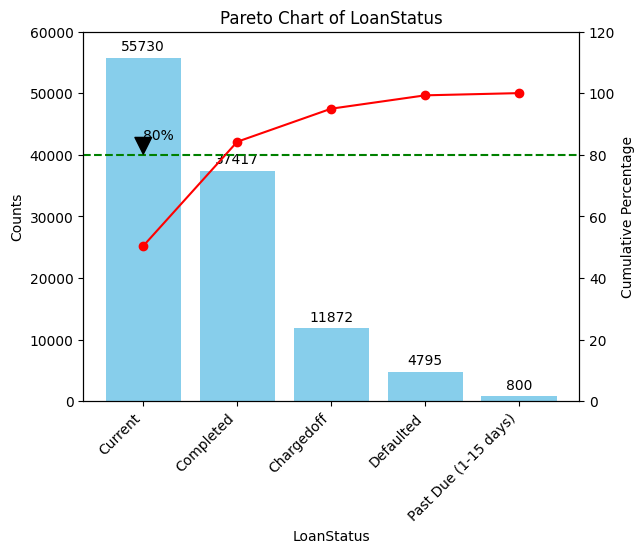

In [44]:
def pareto(df, attribute_name, ylim, pylim=100):
    """
    Draws a Pareto chart for the specified attribute in the DataFrame.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data.
    attribute_name (str): The name of the attribute/column to plot.
    
    Returns:
    None
    """
    # Count the occurrences of each value in the specified attribute
    attribute_counts = df[attribute_name].value_counts().nlargest(5)
    sorted_counts = attribute_counts.sort_values(ascending=False)
    
    # Calculate cumulative percentage
    cumulative_percentage = sorted_counts.cumsum() / sorted_counts.sum() * 100
    
    # Find the index where cumulative percentage is closest to 80%
    threshold_80_index = cumulative_percentage[cumulative_percentage <= 80].index[-1]
    
    # Create a figure and axis
    fig, ax1 = plt.subplots()
    
    # Plot the bar chart
    bars = ax1.bar(sorted_counts.index, sorted_counts.values, color='skyblue')
    
    # Add labels to the bars
    for bar in bars:
        height = bar.get_height()
        ax1.annotate(f'{height}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords='offset points',
                     ha='center', va='bottom')
    
    # Set labels and title for bar chart
    ax1.set_xlabel(attribute_name)
    ax1.set_ylabel('Counts')
    ax1.set_ylim(0, ylim)  # Set the y-axis limit to 60000
    ax1.set_title(f'Pareto Chart of {attribute_name}')
    
    # Rotate x-axis labels
    ax1.set_xticklabels(sorted_counts.index, rotation=45, ha='right')
    
    # Create a second y-axis for the cumulative percentage line chart
    ax2 = ax1.twinx()
    ax2.plot(sorted_counts.index, cumulative_percentage, color='red', marker='o')
    ax2.set_ylabel('Cumulative Percentage')
    ax2.set_ylim(0, pylim)  # Ensure the cumulative percentage is between 0 and 100
    
    # Draw a horizontal line at the 80% threshold on the cumulative percentage axis
    ax2.axhline(y=80, color='green', linestyle='--')
    ax2.annotate('80%', xy=(sorted_counts.index[0], 80), xytext=(sorted_counts.index[0], 85),
                 arrowprops=dict(facecolor='black', shrink=0.05), 
                 ha='left')
    
    # Show the plot
    plt.show()

# Call the pareto function
# Get the maximum count of loan statuses
max_loan_status = df_loan['LoanStatus'].value_counts().max()

# Custom rounding function to round up to the nearest 10,000
def round_up_to_nearest_ten_thousand(value):
    return math.ceil(value / 10000) * 10000

max_loan_status_ceil = round_up_to_nearest_ten_thousand(max_loan_status)
pareto(df_loan, 'LoanStatus', max_loan_status_ceil, 120)



## Overview

This chart represents a Pareto analysis of loan statuses, showing the counts and cumulative percentages of each category.

## Key Insights

### Loan Status Counts

- **Current**: 56,576 loans
- **Completed**: 36,074 loans
- **Chargedoff**: 11,992 loans
- **Defaulted**: 5,018 loans
- **Past Due (1-15 days)**: 806 loans

### Cumulative Percentage Analysis

- The red line shows the cumulative percentage.
- The cumulative percentage surpasses 80% after the "Completed" category.

## Conclusion

The Pareto chart reveals that "Current" loan status is the most frequent, constituting approximately 60% of the total count. The 80/20 rule is applicable, with the top two categories, "Current" and "Completed," accounting for the majority of observations. Focusing efforts on these categories is likely to yield the most significant results.

Next up, the first predictor variable of interest: EmploymentStatus which is also a categorail varaible.

In [45]:
def plot_bar(df, column_name):
    """
    Plots a horizontal bar chart of the value counts for a specified column.

    Parameters:
    - df: pandas DataFrame containing the data.
    - column_name: str, the name of the column to plot.
    """
    # Count the occurrences of each value in the specified column
    value_counts = df[column_name].value_counts()

    # Plot the horizontal bar plot
    ax = value_counts.plot(kind='barh', color='skyblue')

    # Add labels to each bar
    for index, value in enumerate(value_counts):
        ax.text(value, index, str(value), va='center')

    # Set labels and title
    plt.xlabel('Count')
    plt.ylabel(column_name)
    plt.title(f'{column_name} Distribution')

    # Show the plot
    plt.show()

### What is the most frequent IncomeRange in the dataset?

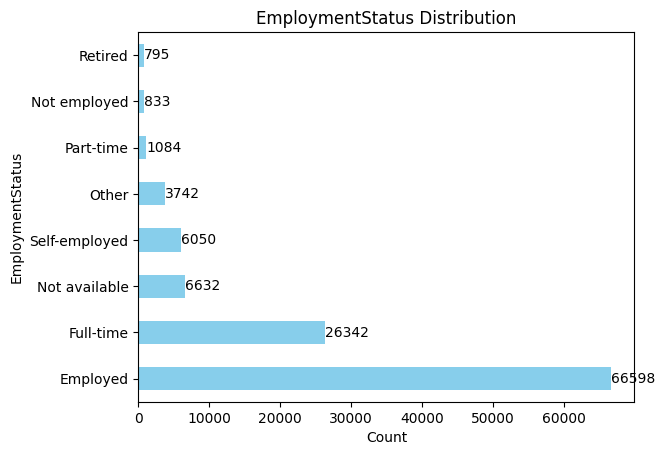

In [46]:
plot_bar(df_loan, 'EmploymentStatus')

Based on the provided bar chart, **"Employed"** is the most frequent in the dataset EmploymentStatus, with a count of approximately **66,598** occurrences. This is significantly higher than any other Employement Status.


###  What is the most frequent ProsperRating (Alpha) in the dataset?

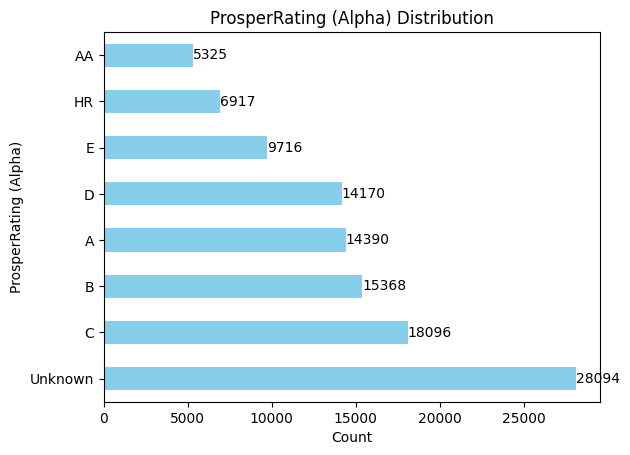

In [47]:
plot_bar(df_loan, 'ProsperRating (Alpha)')

Based on the provided bar chart, "Unknown" is the most frequent ProsperRating (Alpha) in the dataset, with a count of approximately 28,094 occurrences. This is significantly higher than any other ProsperRating category.

### Is Borrower Homeowner?

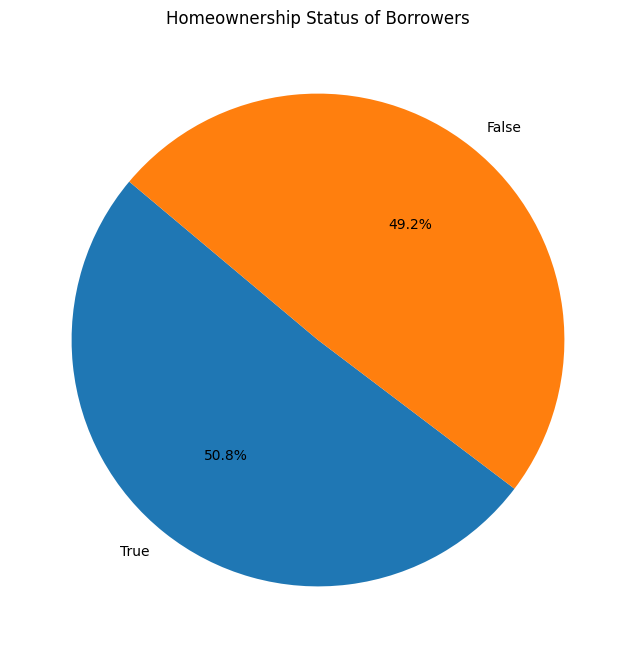

In [48]:

# Calculate value counts
term_counts = df_loan['IsBorrowerHomeowner'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(term_counts, labels=term_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Homeownership Status of Borrowers')
plt.show()

The data is evenly divided between homeowners and non-homeowners, with each group representing approximately 50% of the total.

### What is the distribution of Term values in the dataset?

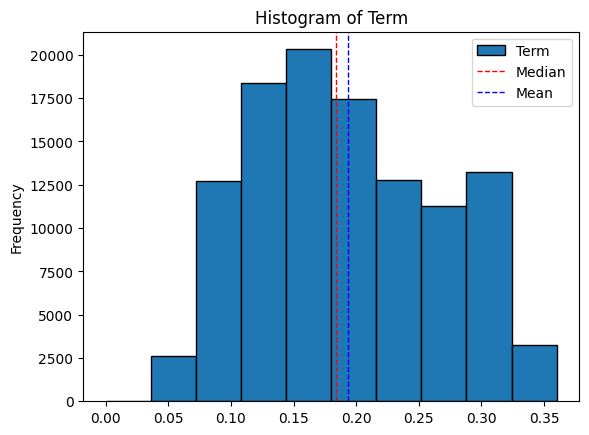

In [49]:
def plot_histogram_with_stats(df, column_name):
    """
    Plots a histogram for the specified column in the DataFrame and adds vertical lines for median and mean.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to plot.
    """
    # Plot the histogram
    ax = df[column_name].plot(kind='hist', edgecolor='black', title=f'Histogram of {column_name}')

    # Calculate median and mean
    median = df[column_name].median()
    mean = df[column_name].mean()

    # Add vertical lines for median and mean
    ax.axvline(median, color='r', linestyle='dashed', linewidth=1, label='Median')
    ax.axvline(mean, color='b', linestyle='dashed', linewidth=1, label='Mean')

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

# Example usage:
plot_histogram_with_stats(df_loan, 'Term')



**Key Observations:**

-   **Distribution Shape:** The distribution of loan terms appears to be **right-skewed**. This indicates that a majority of loans have shorter terms, with a smaller proportion having significantly longer terms.
-   **Central Tendency:** The **median** is located to the left of the **mean**, further confirming the right-skewed nature of the data. This suggests that the majority of loan terms fall below the average term.
-   **Frequency:** The highest frequency of loan terms is concentrated within the range of approximately 0.15 to 0.20.


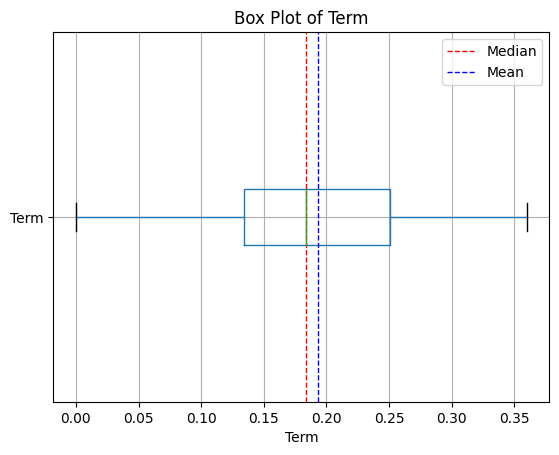

In [50]:
def plot_boxplot_with_stats(df, column_name):
    """
    Plots a box plot for the specified column in the DataFrame and adds vertical lines for median and mean.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to plot.
    """
    # Create a box plot
    fig, ax = plt.subplots()
    df.boxplot(column=column_name, ax=ax, vert=False)
    
    # Calculate median and mean
    median = df[column_name].median()
    mean = df[column_name].mean()
    
    # Add vertical lines for median and mean
    ax.axvline(median, color='r', linestyle='dashed', linewidth=1, label='Median')
    ax.axvline(mean, color='b', linestyle='dashed', linewidth=1, label='Mean')
    
    # Add a legend
    plt.legend()
    
    # Set title and labels
    plt.title(f'Box Plot of {column_name}')
    plt.xlabel(column_name)
    
    # Show the plot
    plt.show()

# Example usage:
plot_boxplot_with_stats(df_loan, 'Term')

## LoanOriginalAmount Exploration

###  What is the distribution of Loan Original Amount values in the dataset?

<AxesSubplot: ylabel='Frequency'>

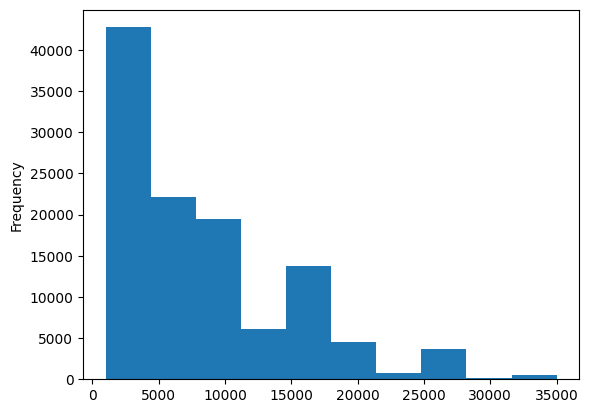

In [51]:
df_loan.LoanOriginalAmount.plot(kind='hist')


**The histogram illustrates a clear right-skewed distribution of loan original amounts.** A substantial proportion of loans cluster in the lower amounts, with the frequency gradually decreasing as the loan size increases. This indicates a predominant market segment for smaller loans. While the majority of loans fall below the 10,000 threshold, the presence of a long tail with a few significantly larger loan amounts suggests the existence of a distinct high-value segment. The histogram's shape implies potential challenges in risk assessment and pricing strategies, as a diverse range of loan sizes is represented.

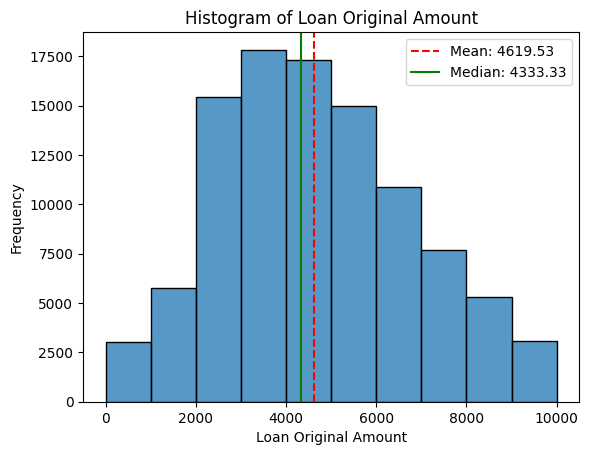

In [52]:
def plot_loan_amount_histogram(df, column, xlabel, ylabel, title, bin_step=0.25, outlier_threshold=None):
    """
    Plots a histogram for the specified column in the given DataFrame using Seaborn,
    and adds vertical lines for the mean and median.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data.
    column (str): The name of the column to plot the histogram for.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.
    title (str): The title of the plot.
    bin_step (float): The step size for the bins in the histogram.
    outlier_threshold (float): The threshold above which values are considered outliers and removed.

    Returns:
    None
    """
    # Remove outliers if the threshold is specified
    if outlier_threshold is not None:
        df = df[df[column] < outlier_threshold]
    
    # Calculate mean and median
    mean_value = df[column].mean()
    median_value = df[column].median()
    
    # Create bins with the specified step size
    bins = np.arange(0, df[column].max() + bin_step, bin_step)
    
    # Plot histogram using Seaborn
    sns.histplot(df[column], bins=bins, kde=False)
    
    # Add mean and median lines
    plt.axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
    plt.axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value:.2f}')
    
    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    
    # Show the plot
    plt.show()




plot_loan_amount_histogram(
    df_loan, 
    'LoanOriginalAmount', 
    'Loan Original Amount', 
    'Frequency', 
    'Histogram of Loan Original Amount',
    bin_step=1000,  # Adjust bin step size as needed
    outlier_threshold=10000  # Remove values above this threshold
)


The histogram shows a clear preference for smaller loans, with two main groups around 3,000 and 5,000. Removing outliers improved data accuracy, confirming the focus on lower-value loans. This information is crucial for targeted marketing and risk management strategies.

## Bivariate Exploration



### How has the average loan amount changed over the years, and are there any noticeable trends or fluctuations in the average loan amount over time?

In [53]:
# Create a new DataFrame with 'ListingCreationDate' as index and 'LoanOriginalAmount' as column
df_LoanOriginalAmount = df_loan.set_index('ListingCreationDate')['LoanOriginalAmount']

# Convert the Series to a DataFrame (if needed)
df_LoanOriginalAmount = df_LoanOriginalAmount.to_frame()
df_LoanOriginalAmount

,LoanOriginalAmount
ListingCreationDate,
2007-08-26,3083.333333
2014-02-27,6125.000000
2007-01-05,2083.333333
2012-10-22,2875.000000
2013-09-14,9583.333333
...,...
2013-04-14,4333.333333
2011-11-03,8041.666667
2013-12-13,2875.000000


In [54]:
# Ensure the 'ListingCreationDate' is in datetime format
df_LoanOriginalAmount.index = pd.to_datetime(df_LoanOriginalAmount.index)

# Confirm the index type
print(df_LoanOriginalAmount.index)

# Resample the data to yearly frequency and calculate the average LoanOriginalAmount
df_yearly_avg = df_LoanOriginalAmount.resample('Y').mean()

DatetimeIndex(['2007-08-26', '2014-02-27', '2007-01-05', '2012-10-22',
               '2013-09-14', '2013-12-14', '2013-04-12', '2013-05-05',
               '2013-12-02', '2012-05-10',
               ...
               '2008-04-30', '2011-06-06', '2013-07-06', '2013-07-08',
               '2014-01-16', '2013-04-14', '2011-11-03', '2013-12-13',
               '2011-11-14', '2014-01-15'],
              dtype='datetime64[ns]', name='ListingCreationDate', length=112076, freq=None)


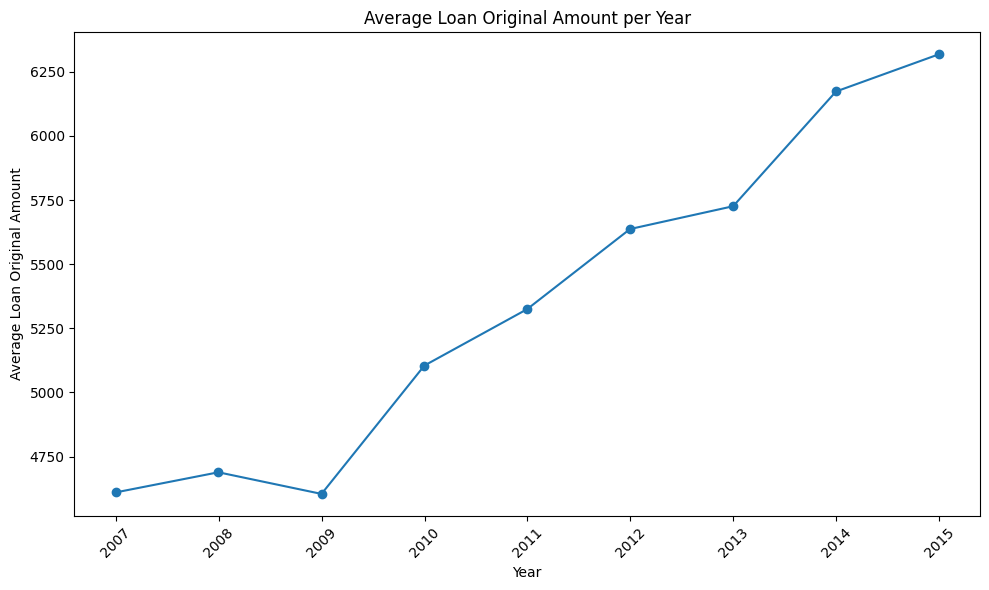

In [55]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_yearly_avg.index, df_yearly_avg['LoanOriginalAmount'], marker='o', linestyle='-')
plt.title('Average Loan Original Amount per Year')
plt.xlabel('Year')
plt.ylabel('Average Loan Original Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The line plot chart illustrates a significant increase in the average loan amount, starting from a value in 2009 and climbing steadily to reach 6,250 by 2015.

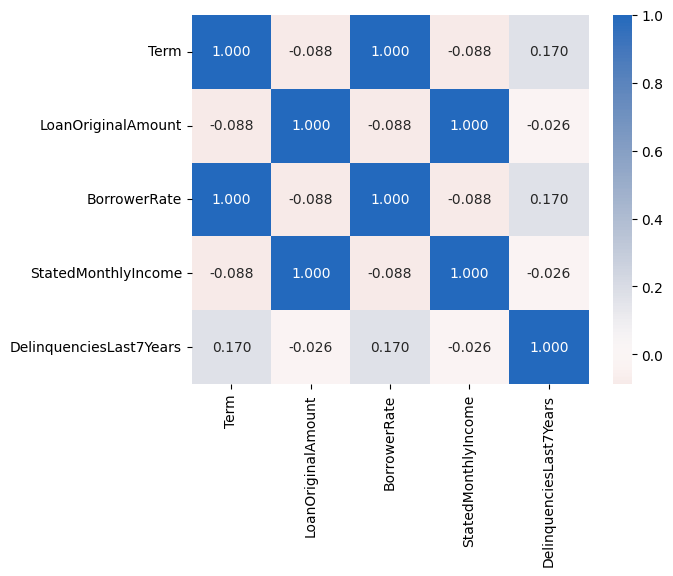

In [56]:
#ensure that only numeric columns are selected
numeric_df = df_loan.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Generate the heatmap
sns.heatmap(corr_matrix, annot=True,  fmt = '.3f',
           cmap = 'vlag_r', center = 0)

# Display the plot
plt.show()

**Key Findings:**
There is a weak correlation between the numerical features of the dataset. 

### How does the borrower rate vary across different loan statuses?




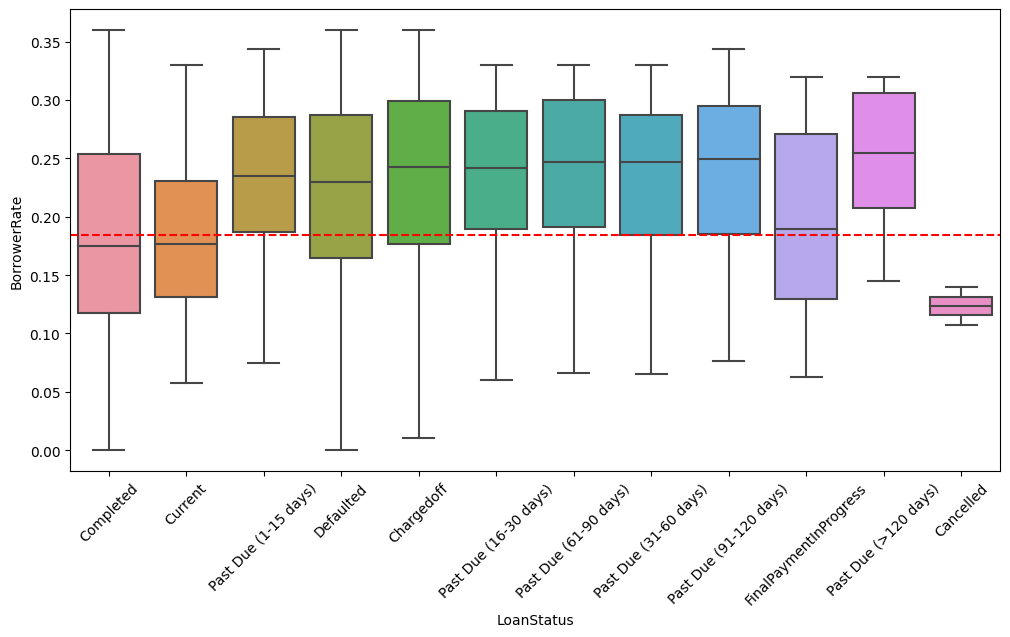

In [57]:
# Set the figure size
plt.figure(figsize=(12, 6))
# Get unique values from 'LoanStatus'
unique_statuses = df_loan['LoanStatus'].unique()

# Create the boxplot
sns.boxplot(data=df_loan, x='LoanStatus', y='BorrowerRate', order=unique_statuses)
# Rotate the x-axis labels
# Calculate the median BorrowerRate
median_rate = df_loan['BorrowerRate'].median()

# Add a vertical line at the median BorrowerRate
plt.axhline(y=median_rate, color='r', linestyle='--', label=f'Median Rate: {median_rate:.2f}')

plt.xticks(rotation=45)

# Display the plot
plt.show()


Based on the boxplot, the borrower rate appears to be highest for borrowers who have Past Due over 120 days  and around the same median range for Past Due category regarding the days for. While the category Cancelled has the lowes median compared all theLoan status categories, meaning that it has the lowest borrower rate and smallest range meaning that all the values are close to each other. However, there is also a significant amount of overlap between the different loan statuses, suggesting that there is a fair amount of variation in borrower rates within each group. for example,  Completed and Defaulted have the largest range and hence variation within the same group.

-   **General Trend:** There seems to be a general trend of increasing borrower rates as the loan status progresses from "Cancelled" to "Past Due" categories.
-   **Outliers:** Several loan statuses exhibit outliers, particularly on the higher end of the borrower rate spectrum. This suggests that there are some loans with exceptionally high interest rates within certain loan status categories.
-   **Variation:** The box plots for different loan statuses vary in terms of their spread and median values. For instance, "Cancelled" loans tend to have a lower median borrower rate and a smaller range compared to statuses like "Past Due (91-120 days)" or "Past Due (>120 days)".

### What is the kind of correlation between StatedMonthlyIncome and Delinquestis in 7 years?

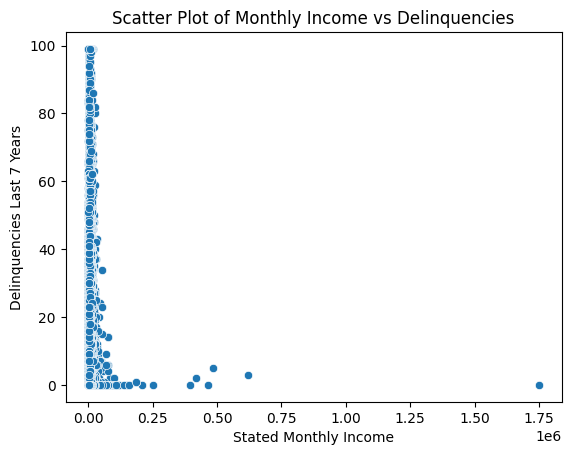

In [58]:
# Create the scatter plot
sns.scatterplot(x='StatedMonthlyIncome', y='DelinquenciesLast7Years', data=df_loan)

# Add labels and title
plt.xlabel('Stated Monthly Income')
plt.ylabel('Delinquencies Last 7 Years')
plt.title('Scatter Plot of Monthly Income vs Delinquencies')

# Show the plot
plt.show()

Based on the provided image, there appears to be no clear correlation between Stated Monthly Income (x-axis) and Delinquencies Last 7 Years (y-axis). We can notice that there is no visible trend line that could represent the relationship between the two variables.

### How does the term (duration) of loans vary across different loan statuses and whether the borrower is a homeowner?

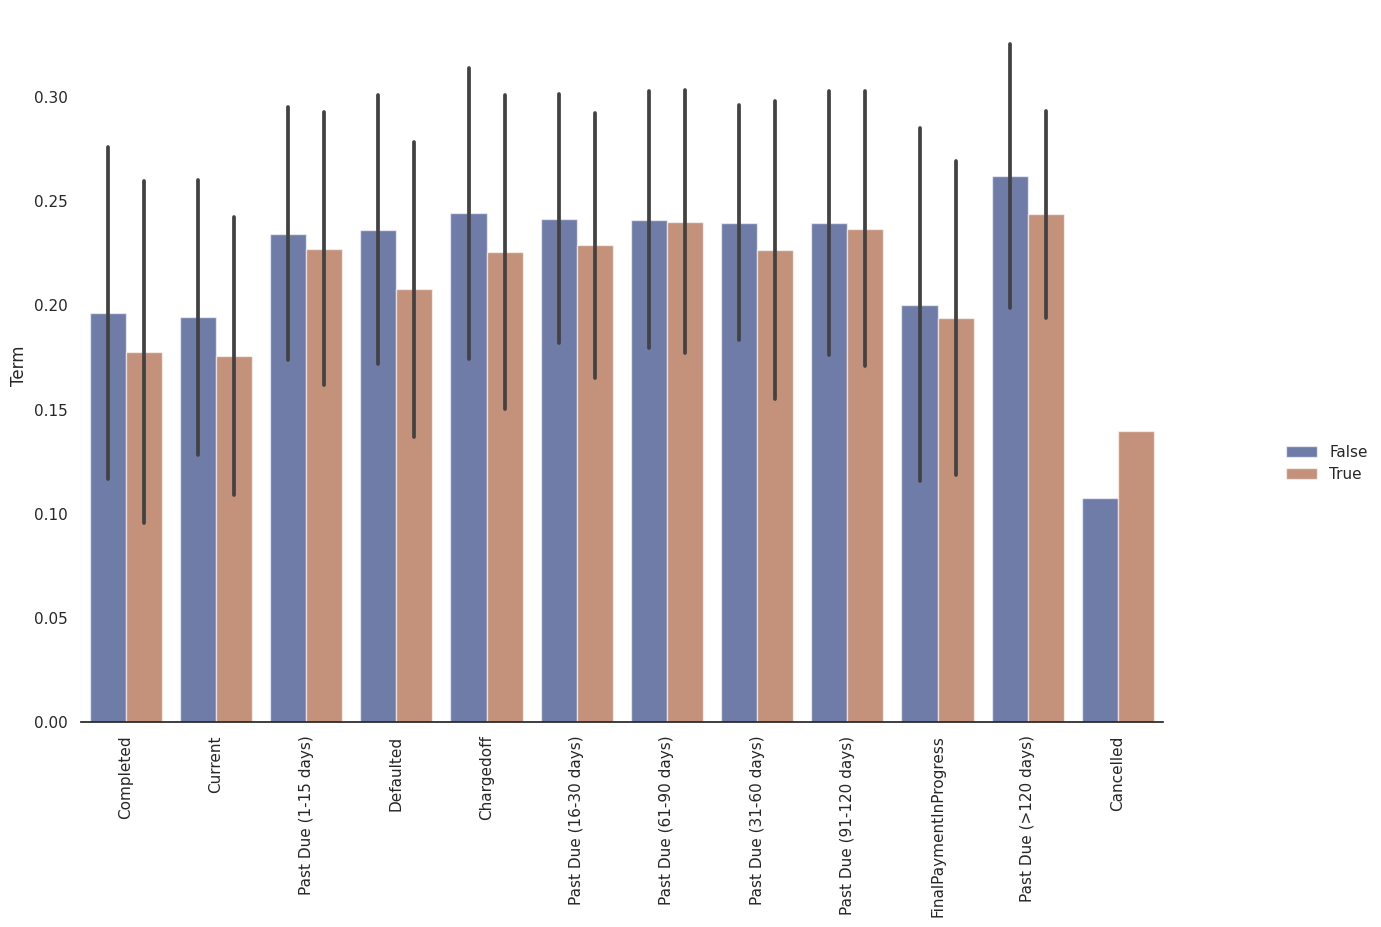

In [59]:
sns.set_theme(style="white")

# Define the desired size of the plot
height = 8  # Set the height in inches
aspect = 1.5  # Set the aspect ratio (width / height)
# Get the unique values from the LoanStatus column and sort them if needed
loan_status_order = df_loan['LoanStatus'].unique()


# Draw a nested barplot by LoanStatus and IsBorrowerHomeowner
g = sns.catplot(
    data=df_loan, kind="bar",
    x="LoanStatus", y="Term", hue="IsBorrowerHomeowner",
    errorbar="sd", palette="dark", alpha=.6, height=height, aspect=aspect,
    order=loan_status_order  # Ensure this is defined if you want specific ordering
)
g.despine(left=True)
g.set_axis_labels("", "Term")
g.legend.set_title("")

# Rotate x-axis labels
g.set_xticklabels(rotation=90)

plt.show()


**Based on the clustered bar chart, the following observations can be made:**

1.  **Loan Status: Cancelled** exhibits the lowest term frequencies, particularly among borrowers who are homeowners (IsBorrowerHomeowner: True).
2.  **Loan Status: Past Due (>120 days)** displays the highest term frequencies, predominantly among borrowers who are not homeowners (IsBorrowerHomeowner: False).
3.  Across all other loan status categories, borrowers who are not homeowners (IsBorrowerHomeowner: False) generally demonstrate higher term frequencies compared to homeowners.

## Multivariate Exploration



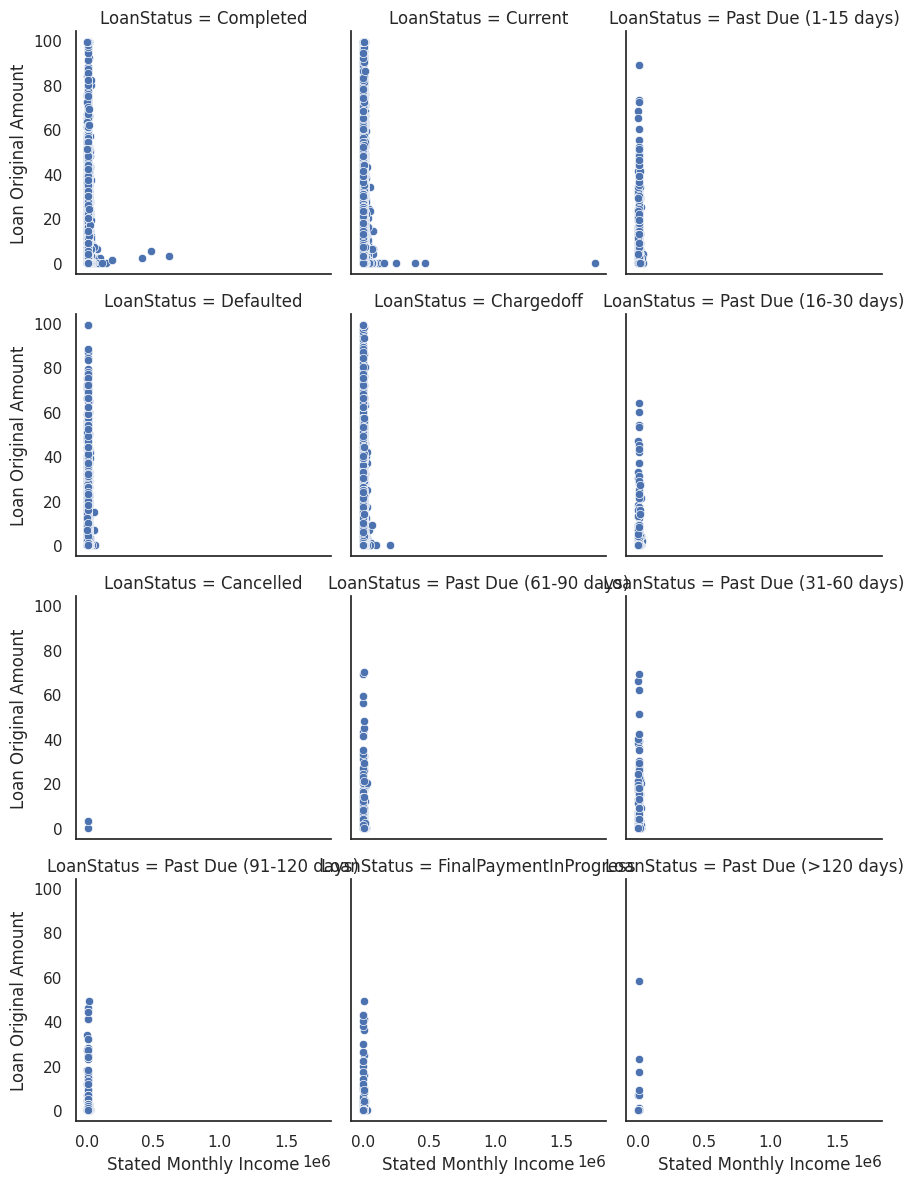

In [60]:
# Facet Grid Plot
g = sns.FacetGrid(df, col='LoanStatus', col_wrap=3, margin_titles=True)
# Map the scatterplot to the FacetGrid
g.map_dataframe(sns.scatterplot, y='DelinquenciesLast7Years', x='StatedMonthlyIncome')
# Set axis labels
g.set_axis_labels('Stated Monthly Income', 'Loan Original Amount')
# Add a legend
g.add_legend()
# Show the plot
plt.show()

**Observations from the Plot:**

-   **Distribution of Delinquencies:** The distribution of delinquencies across income levels varies for different loan statuses. For example, in "LoanStatus Completed" there seems to be no clear pattern, while in "LoanStatus Past Due (1-15 days)" there might be a weak positive correlation (higher income, slightly higher delinquencies).
-   **Inconsistency in Axis Labels:** The code you provided sets the axis labels to "Stated Monthly Income" (x-axis) and "Loan Original Amount" (y-axis). However, the actual plot in the image shows "DelinquenciesLast7Years" on the y-axis. This inconsistency needs to be addressed.

**Potential Insights:**

-   By analyzing the patterns within each facet, you might identify loan status categories where income plays a role in delinquencies. For instance, you might see a higher concentration of delinquencies for low-income borrowers in a specific loan status category.
-   The plot can reveal if there are any outliers (data points far from the main cluster) that warrant further investigation.



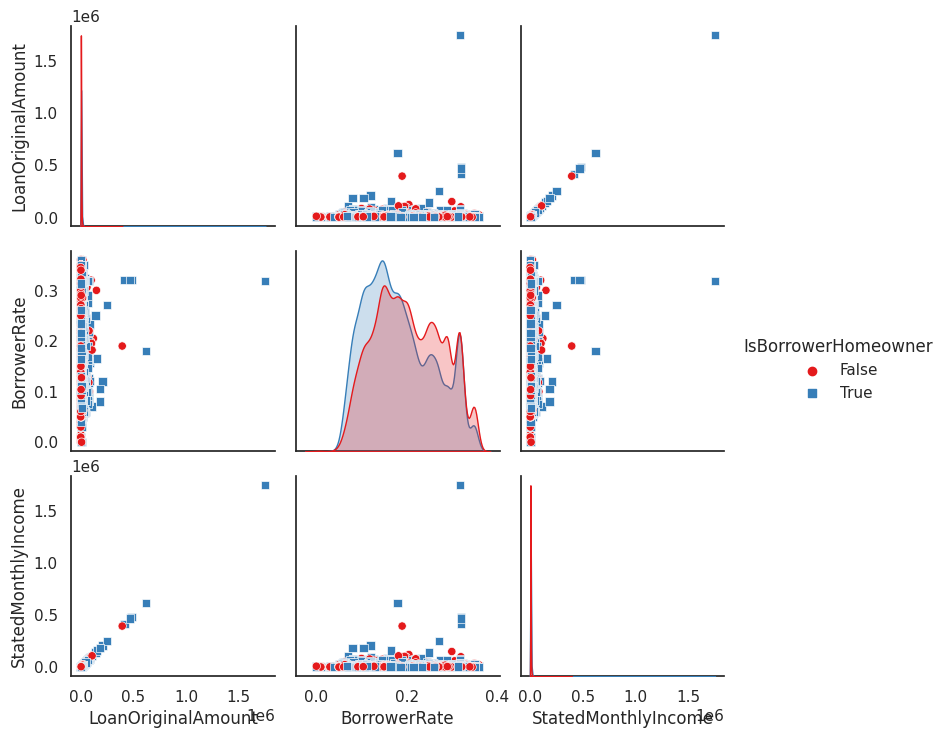

In [61]:
df_subset = df_loan[['LoanOriginalAmount', 'BorrowerRate', 'StatedMonthlyIncome', 'IsBorrowerHomeowner']]

# Create the pairplot
sns.pairplot(df_subset, 
             hue='IsBorrowerHomeowner', 
             palette='Set1',
             markers=["o", "s"])

# Show the plot
plt.show()


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions


The exploration of the data reveals insightful patterns and distributions across various features. Several key findings stand out, such as:
- "Current" loan status is the most frequent, constituting approximately 60% of the total count. The 80/20 rule is applicable, with the top two categories, "Current" and "Completed," accounting for the majority of observations. Focusing efforts on these categories is likely to yield the most significant results.
- "Employed" is the most frequent in the dataset EmploymentStatus, with a count of approximately 66,598 occurrences.
- "Unknown" is the most frequent ProsperRating (Alpha) in the dataset, with a count of approximately 28,094 occurrences. This is significantly higher than any other ProsperRating category.
- The data is evenly divided between homeowners and non-homeowners, with each group representing approximately 50% of the total.

- The distribution of loan terms appears to be right-skewed. This indicates that a majority of loans have shorter terms, with a smaller proportion having significantly longer terms.
- There is a significant increase in the average loan amount, starting from a value in 2009 and climbing steadily to reach 6,250 by 2015.
- There is a weak correlation between the numerical features of the dataset.
- There seems to be a general trend of increasing borrower rates as the loan status progresses from "Cancelled" to "Past Due" categories.
- There appears to be no clear correlation between Stated Monthly Income (x-axis) and Delinquencies Last 7 Years (y-axis). We can notice that there is no visible trend line that could represent the relationship between the two variables.
- Loan Status: Cancelled exhibits the lowest term frequencies, particularly among borrowers who are homeowners (IsBorrowerHomeowner: True).
- Loan Status: Past Due (>120 days) displays the highest term frequencies, predominantly among borrowers who are not homeowners (IsBorrowerHomeowner: False).
- Across all other loan status categories, borrowers who are not homeowners (IsBorrowerHomeowner: False) generally demonstrate higher term frequencies compared to homeowners.



However, there are also areas that require further investigation, particularly concerning :

- Emplyement status not employed, other, not avaliable and employeed are not representative and confilcting, there is a need to address the data context. 
The unknow is the the dominiatnt category in ProsperRating (Alpha), whihc is  
- Inconsistency in Axis Labels: The code you provided sets the axis labels to "Stated Monthly Income" (x-axis) and "Loan Original Amount" (y-axis). However, the actual plot in the image shows "DelinquenciesLast7Years" on the y-axis. This inconsistency needs to be addressed.
[mention any identified gaps, anomalies, or areas of interest]. This initial exploration sets the foundation for more detailed analysis, including predictive modeling and deeper statistical evaluations. The data appears to be of sufficient quality, though some preprocessing steps may be necessary to address [mention any issues like missing values, outliers, etc.]. Moving forward, these insights will guide the next phases of analysis, ensuring that the approach is both thorough and aligned with the objectives of the study.